In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("blinkit project/blinkit_data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [12]:
df.describe ()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [14]:
df.shape

(8523, 12)

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

<Figure size 1600x2000 with 0 Axes>

<Figure size 1600x2000 with 0 Axes>

Text(0, 0.5, 'Item Type')

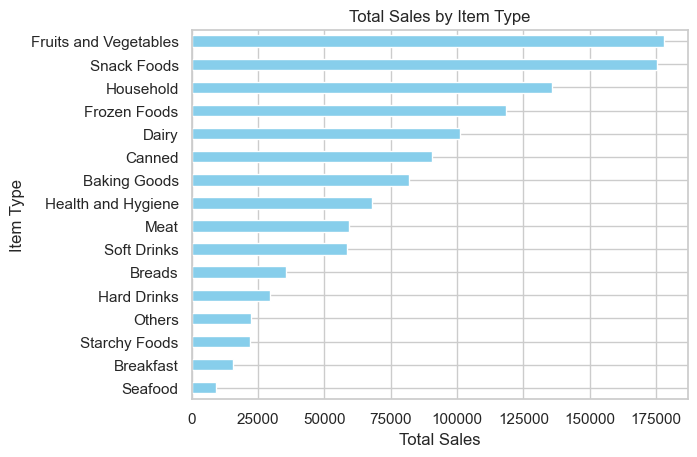

In [30]:
plt.subplot(1, 1, 1)
item_sales = df.groupby('Item Type')['Sales'].sum().sort_values()
item_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type3'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type1')])

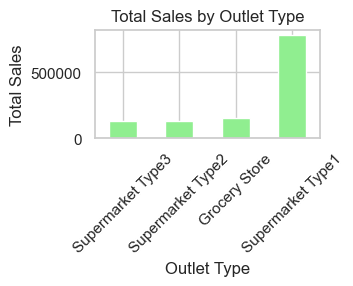

In [32]:
plt.subplot(3, 2, 2)
outlet_sales = df.groupby('Outlet Type')['Sales'].sum().sort_values()
outlet_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

Text(0, 0.5, 'Total Sales')

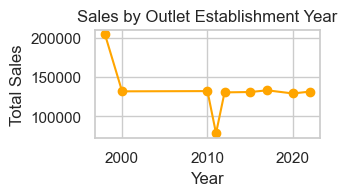

In [34]:
plt.subplot(3, 2, 3)
year_sales = df.groupby('Outlet Establishment Year')['Sales'].sum()
year_sales.plot(marker='o', color='orange')
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

Text(0.5, 0, 'Item Weight')

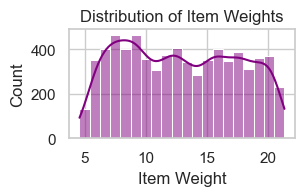

In [36]:
plt.subplot(3, 2, 4)
sns.histplot(df['Item Weight'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of Item Weights')
plt.xlabel('Item Weight')

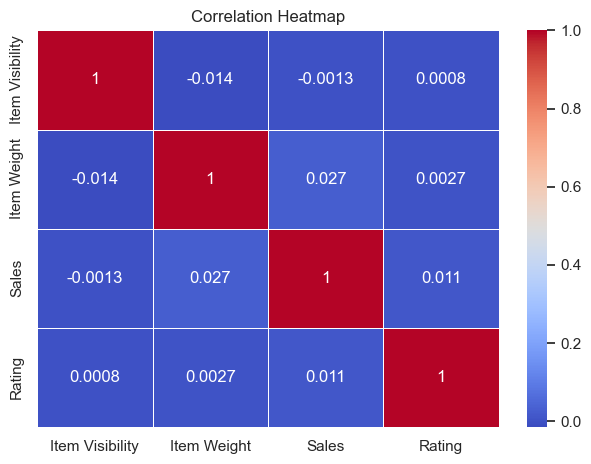

In [40]:

plt.subplot(1, 1, 1)
corr = df[['Item Visibility', 'Item Weight', 'Sales', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Adjust layout and show
plt.tight_layout()
plt.show()